# Tour of hera_sim

This notebook briefly introduces some of the effects that can be modeled with `hera_sim`.

In [ ]:
%matplotlib notebook
import aipy, uvtools
import numpy as np
import pylab as plt

In [5]:
from hera_sim import foregrounds, noise, sigchain, rfi

In [6]:
fqs = np.linspace(.1,.2,1024,endpoint=False)
lsts = np.linspace(0,2*np.pi,10000, endpoint=False)
times = lsts / (2*np.pi) * aipy.const.sidereal_day
bl_len_ns = 30.

## Foregrounds

### Diffuse Foregrounds

In [7]:
Tsky_mdl = noise.HERA_Tsky_mdl['xx']
vis_fg_diffuse = foregrounds.diffuse_foreground(Tsky_mdl, lsts, fqs, bl_len_ns)

<IPython.core.display.Javascript object>


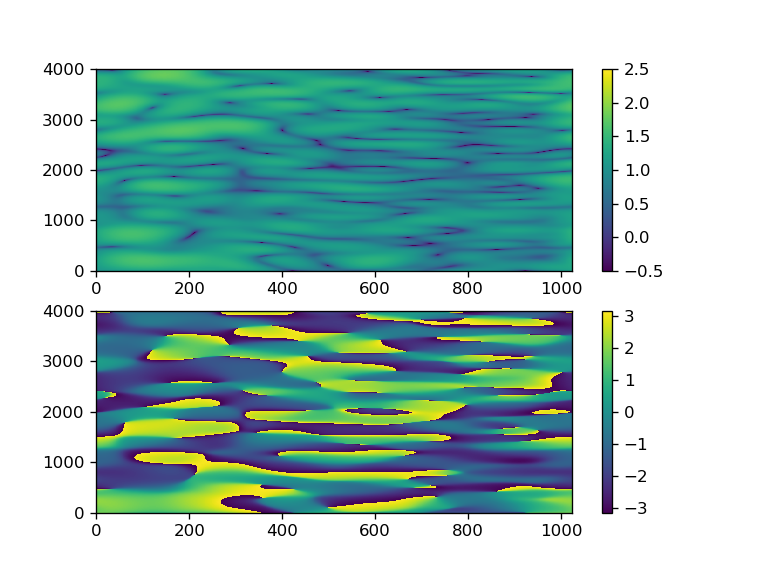

In [8]:
MX, DRNG = 2.5, 3
plt.figure()
plt.subplot(211); uvtools.plot.waterfall(vis_fg_diffuse, mode='log', mx=MX, drng=DRNG); plt.colorbar(); plt.ylim(0,4000)
plt.subplot(212); uvtools.plot.waterfall(vis_fg_diffuse, mode='phs'); plt.colorbar(); plt.ylim(0,4000)
plt.show()

### Point-Source Foregrounds

In [9]:
vis_fg_pntsrc = foregrounds.pntsrc_foreground(lsts, fqs, bl_len_ns, nsrcs=200)

<IPython.core.display.Javascript object>


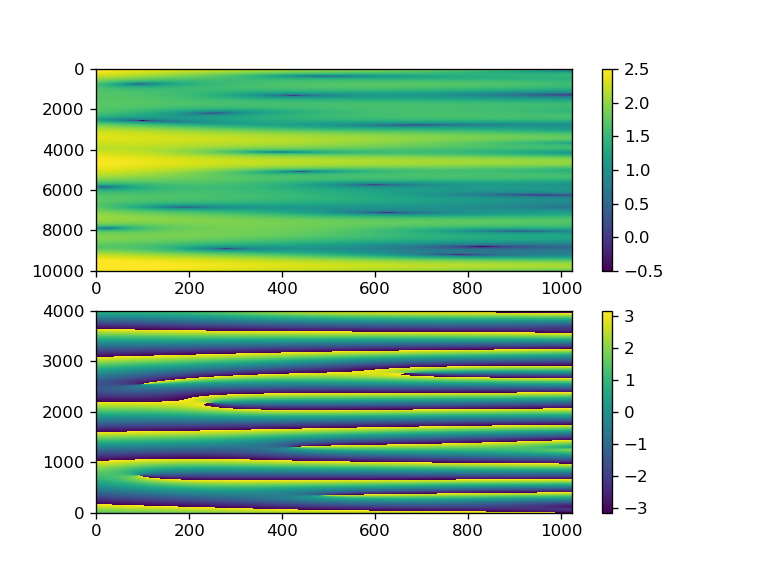

In [10]:
plt.figure()
plt.subplot(211); uvtools.plot.waterfall(vis_fg_pntsrc, mode='log', mx=MX, drng=DRNG); plt.colorbar()#; plt.ylim(0,4000)
plt.subplot(212); uvtools.plot.waterfall(vis_fg_pntsrc, mode='phs'); plt.colorbar(); plt.ylim(0,4000)
plt.show()

### Diffuse and Point-Source Foregrounds

In [11]:
vis_fg = vis_fg_diffuse + vis_fg_pntsrc

<IPython.core.display.Javascript object>


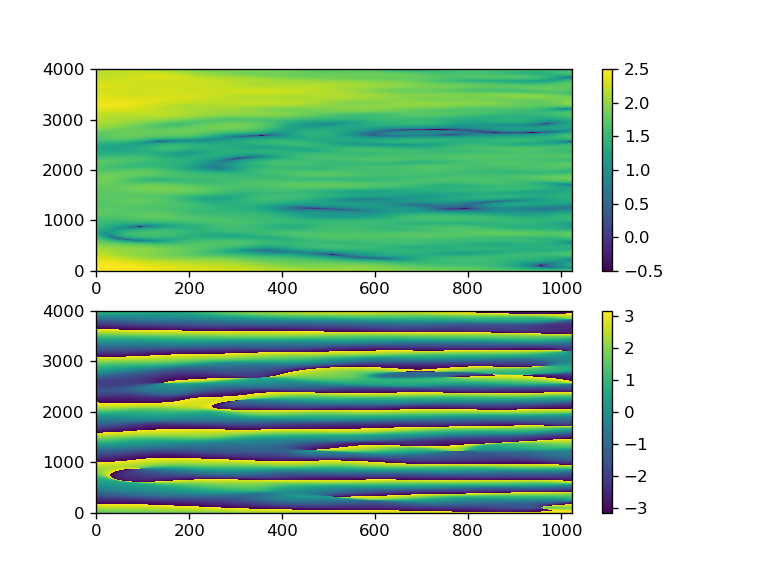

In [12]:
plt.figure()
plt.subplot(211); uvtools.plot.waterfall(vis_fg, mode='log', mx=MX, drng=DRNG); plt.colorbar(); plt.ylim(0,4000)
plt.subplot(212); uvtools.plot.waterfall(vis_fg, mode='phs'); plt.colorbar(); plt.ylim(0,4000)
plt.show()

## Noise

In [13]:
tsky = noise.resample_Tsky(fqs,lsts,Tsky_mdl=noise.HERA_Tsky_mdl['xx'])
t_rx = 150.
nos_jy = noise.sky_noise_jy(tsky + t_rx, fqs, lsts)

<IPython.core.display.Javascript object>


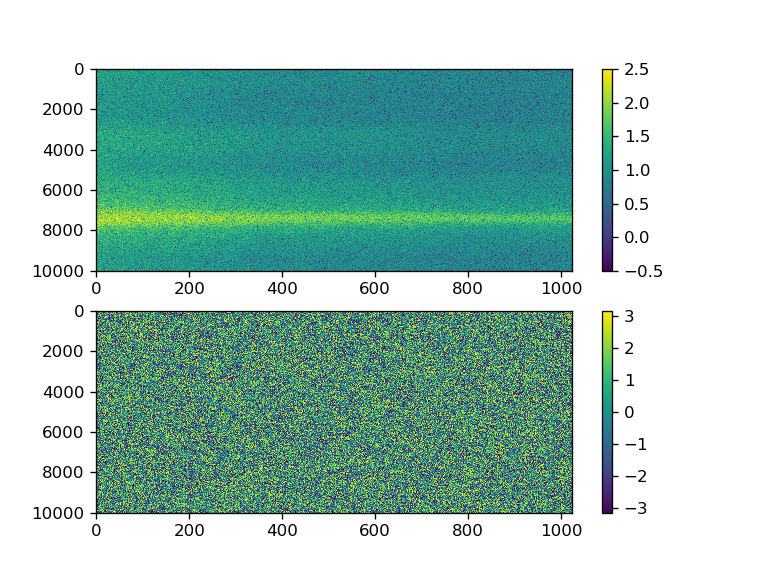

In [14]:
plt.figure()
plt.subplot(211); uvtools.plot.waterfall(nos_jy, mode='log', mx=MX, drng=DRNG); plt.colorbar()#; plt.ylim(0,4000)
plt.subplot(212); uvtools.plot.waterfall(nos_jy, mode='phs'); plt.colorbar()#; plt.ylim(0,4000)
plt.show()

In [16]:
vis_fg_nos = vis_fg + nos_jy

<IPython.core.display.Javascript object>


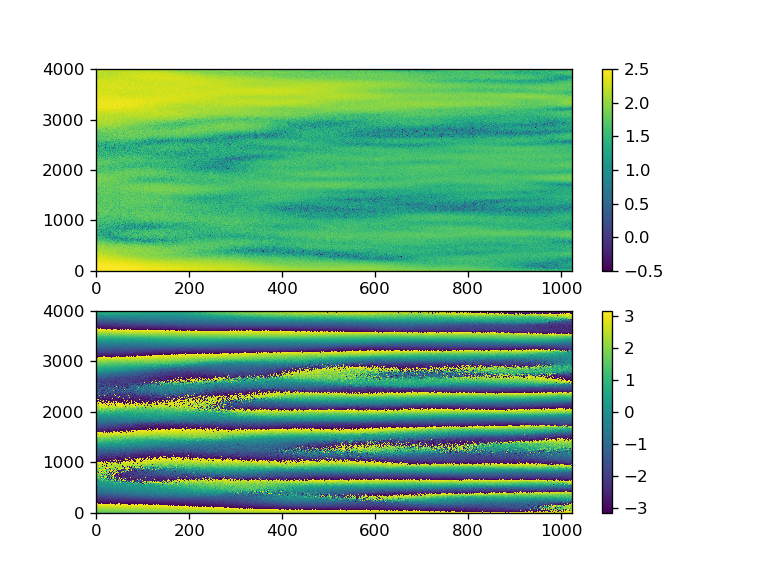

In [17]:
plt.figure()
plt.subplot(211); uvtools.plot.waterfall(vis_fg_nos, mode='log', mx=MX, drng=DRNG); plt.colorbar(); plt.ylim(0,4000)
plt.subplot(212); uvtools.plot.waterfall(vis_fg_nos, mode='phs'); plt.colorbar(); plt.ylim(0,4000)
plt.show()

## RFI

In [18]:
rfi1 = rfi.rfi_stations(fqs, lsts)
rfi2 = rfi.rfi_impulse(fqs, lsts, chance=.02)
rfi3 = rfi.rfi_scatter(fqs, lsts, chance=.001)
rfi_all = rfi1 + rfi2 + rfi3

<IPython.core.display.Javascript object>


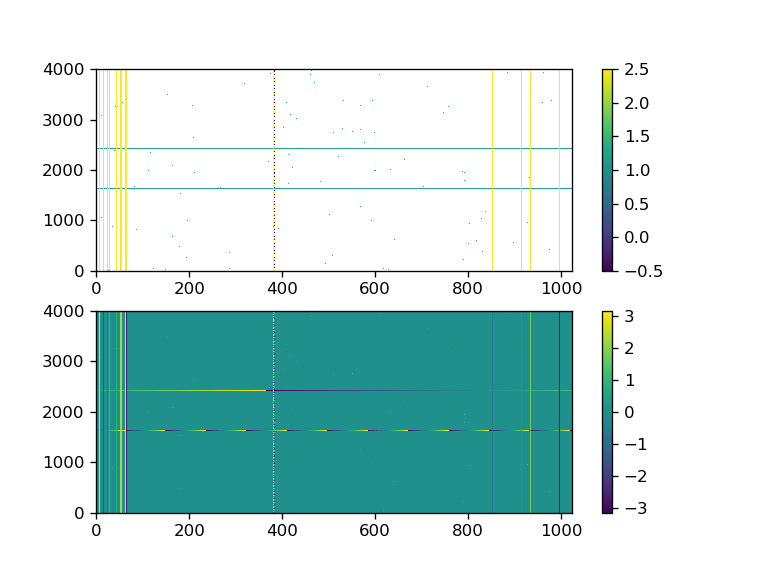

/home/steven/miniconda3/envs/hera_sim/lib/python2.7/site-packages/uvtools/plot.py:13: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


In [19]:
plt.figure()
plt.subplot(211); uvtools.plot.waterfall(rfi_all, mode='log', mx=MX, drng=DRNG); plt.colorbar(); plt.ylim(0,4000)
plt.subplot(212); uvtools.plot.waterfall(rfi_all, mode='phs'); plt.colorbar(); plt.ylim(0,4000)
plt.show()

In [21]:
vis_fg_nos_rfi = vis_fg_nos + rfi_all

<IPython.core.display.Javascript object>


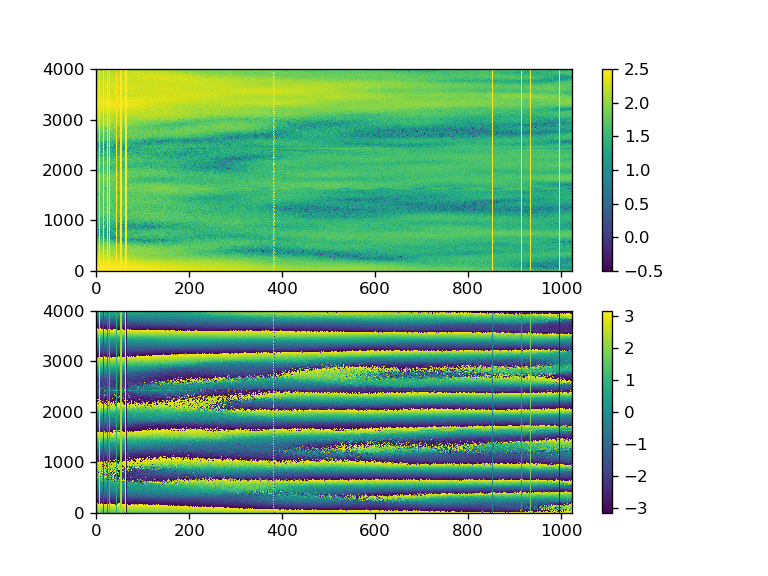

In [22]:
plt.figure()
plt.subplot(211); uvtools.plot.waterfall(vis_fg_nos_rfi, mode='log', mx=MX, drng=DRNG); plt.colorbar(); plt.ylim(0,4000)
plt.subplot(212); uvtools.plot.waterfall(vis_fg_nos_rfi, mode='phs'); plt.colorbar(); plt.ylim(0,4000)
plt.show()

## Gains

<IPython.core.display.Javascript object>


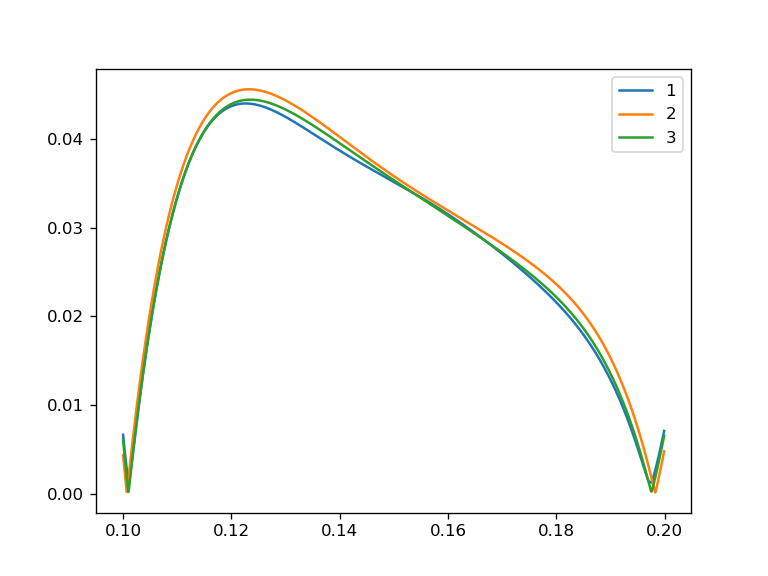

In [23]:
g = sigchain.gen_gains(fqs, [1,2,3])
plt.figure()
for i in g: plt.plot(fqs, np.abs(g[i]), label=str(i))
plt.legend(); plt.show()
gainscale = np.average([np.median(np.abs(g[i])) for i in g])
MXG = MX + np.log10(gainscale)

<IPython.core.display.Javascript object>


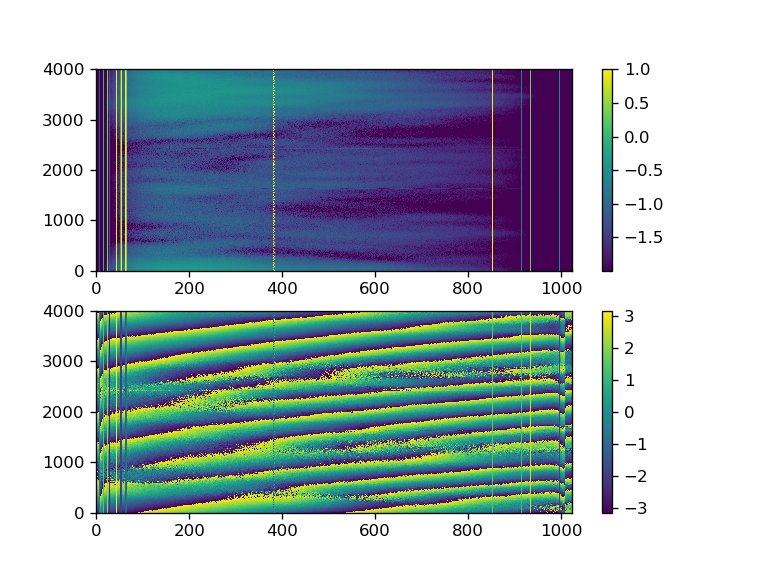

In [24]:
vis_total = sigchain.apply_gains(vis_fg_nos_rfi, g, (1,2))
plt.figure()
plt.subplot(211); uvtools.plot.waterfall(vis_total, mode='log', mx=MXG, drng=DRNG); plt.colorbar(); plt.ylim(0,4000)
plt.subplot(212); uvtools.plot.waterfall(vis_total, mode='phs'); plt.colorbar(); plt.ylim(0,4000)
plt.show()

## Crosstalk

<IPython.core.display.Javascript object>


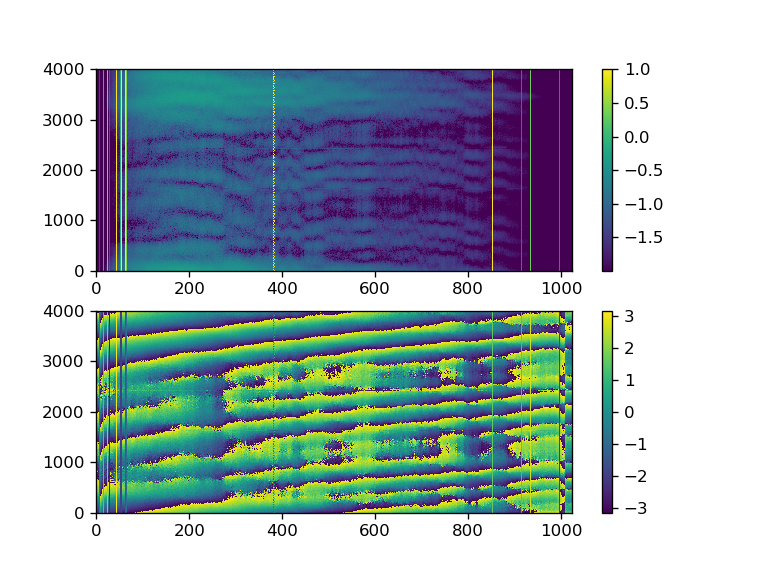

In [25]:
xtalk = sigchain.gen_xtalk(fqs)
vis_xtalk = sigchain.apply_xtalk(vis_fg_nos_rfi, xtalk)
vis_xtalk = sigchain.apply_gains(vis_xtalk, g, (1,2))
plt.figure()
plt.subplot(211); uvtools.plot.waterfall(vis_xtalk, mode='log', mx=MXG, drng=DRNG); plt.colorbar(); plt.ylim(0,4000)
plt.subplot(212); uvtools.plot.waterfall(vis_xtalk, mode='phs'); plt.colorbar(); plt.ylim(0,4000)
plt.show()